In [2]:
!pip install h2o

     |████████████████████████████████| 129.3MB 70kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.1-py2.py3-none-any.whl size=129358602 sha256=c6c1ecc670efd3fa0f960c88c37fade3f0ad300edec1b0ff91b5f451bc084b11
  Stored in directory: /root/.cache/pip/wheels/33/ac/52/165c35d747abdb629c3c9fb7e087f360c662d8cb58824caed8
Successfully built h2o


In [3]:

import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome training set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()

# Run AutoML for 10 models
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkrmxzipq
  JVM stdout: /tmp/tmpkrmxzipq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkrmxzipq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_6cqvid
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200831_075250,0.787623,0.554503,0.806777,0.324704,0.433553,0.187968
StackedEnsemble_BestOfFamily_AutoML_20200831_075250,0.78608,0.555991,0.804717,0.3222,0.434173,0.188506
GBM_5_AutoML_20200831_075250,0.78219,0.558353,0.801738,0.319658,0.435512,0.18967
GBM_2_AutoML_20200831_075250,0.777673,0.562514,0.796364,0.334056,0.437583,0.191479
GBM_1_AutoML_20200831_075250,0.777294,0.562744,0.799184,0.356261,0.437727,0.191605
GBM_3_AutoML_20200831_075250,0.775488,0.564794,0.794892,0.327971,0.438722,0.192477
GBM_4_AutoML_20200831_075250,0.77248,0.569483,0.792582,0.336913,0.440873,0.194369
XGBoost_3_AutoML_20200831_075250,0.770601,0.571069,0.789847,0.338955,0.441546,0.194963
DRF_1_AutoML_20200831_075250,0.764975,0.5801,0.782338,0.336001,0.445222,0.198222
XGBoost_2_AutoML_20200831_075250,0.754557,0.606215,0.774276,0.36111,0.454609,0.206669


In [5]:
m = h2o.get_model(lb[2,"model_id"])
m

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_20200831_075250


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,54.0,54.0,43659.0,9.0,15.0,12.592592,54.0,65.0,59.462963




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.13596899235844648
RMSE: 0.3687397352584157
LogLoss: 0.43367572194174026
Mean Per-Class Error: 0.1775087078118932
AUC: 0.9084987641981738
AUCPR: 0.9187881721654106
Gini: 0.8169975283963475

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4770977787451439: 


,,0,1,Error,Rate
0,0,3628.0,1077.0,0.2289,(1077.0/4705.0)
1,1,698.0,4597.0,0.1318,(698.0/5295.0)
2,Total,4326.0,5674.0,0.1775,(1775.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.477098,0.838180,219.0
1,max f2,0.330068,0.898544,280.0
2,max f0point5,0.615865,0.851838,155.0
3,max accuracy,0.487220,0.823600,215.0
4,max precision,0.974273,1.000000,0.0
5,max recall,0.110785,1.000000,375.0
6,max specificity,0.974273,1.000000,0.0
7,max absolute_mcc,0.484864,0.645893,216.0
8,max min_per_class_accuracy,0.516390,0.820616,200.0
9,max mean_per_class_accuracy,0.524135,0.822491,196.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.945013,1.888574,1.888574,1.000,0.955262,1.000000,0.955262,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.932846,1.888574,1.888574,1.000,0.938068,1.000000,0.946665,0.018886,0.037771,88.857413,88.857413,0.037771
2,3,0.03,0.923546,1.888574,1.888574,1.000,0.928333,1.000000,0.940554,0.018886,0.056657,88.857413,88.857413,0.056657
3,4,0.04,0.912732,1.888574,1.888574,1.000,0.918019,1.000000,0.934920,0.018886,0.075543,88.857413,88.857413,0.075543
4,5,0.05,0.904461,1.869688,1.884797,0.990,0.908337,0.998000,0.929604,0.018697,0.094240,86.968839,88.479698,0.094027
5,6,0.10,0.868527,1.877243,1.881020,0.994,0.886131,0.996000,0.907868,0.093862,0.188102,87.724268,88.101983,0.187252
6,7,0.15,0.826544,1.828140,1.863393,0.968,0.847741,0.986667,0.887825,0.091407,0.279509,82.813975,86.339314,0.275258
7,8,0.20,0.786631,1.767705,1.839471,0.936,0.806972,0.974000,0.867612,0.088385,0.367894,76.770538,83.947120,0.356842
8,9,0.30,0.704030,1.671388,1.783444,0.885,0.744841,0.944333,0.826688,0.167139,0.535033,67.138810,78.344350,0.499539
9,10,0.40,0.620663,1.493862,1.711048,0.791,0.661844,0.906000,0.785477,0.149386,0.684419,49.386213,71.104816,0.604504




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1896703255757227
RMSE: 0.43551156767154037
LogLoss: 0.5583525216632215
Mean Per-Class Error: 0.29024725067961565
AUC: 0.7821904047991057
AUCPR: 0.8017384581329675
Gini: 0.5643808095982115

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3903577797997621: 


,,0,1,Error,Rate
0,0,2375.0,2330.0,0.4952,(2330.0/4705.0)
1,1,763.0,4532.0,0.1441,(763.0/5295.0)
2,Total,3138.0,6862.0,0.3093,(3093.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.390358,0.745579,255.0
1,max f2,0.157399,0.857082,358.0
2,max f0point5,0.619578,0.731108,149.0
3,max accuracy,0.508226,0.711300,199.0
4,max precision,0.974105,1.000000,0.0
5,max recall,0.061541,1.000000,391.0
6,max specificity,0.974105,1.000000,0.0
7,max absolute_mcc,0.508226,0.420028,199.0
8,max min_per_class_accuracy,0.526280,0.707271,191.0
9,max mean_per_class_accuracy,0.508226,0.709753,199.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 53.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.941237,1.831917,1.831917,0.970,0.954214,0.970000,0.954214,0.018319,0.018319,83.191690,83.191690,0.017682
1,2,0.02,0.928561,1.850803,1.841360,0.980,0.934352,0.975000,0.944283,0.018508,0.036827,85.080264,84.135977,0.035764
2,3,0.03,0.917393,1.831917,1.838212,0.970,0.923060,0.973333,0.937209,0.018319,0.055146,83.191690,83.821215,0.053446
3,4,0.04,0.907265,1.718602,1.808310,0.910,0.912002,0.957500,0.930907,0.017186,0.072332,71.860246,80.830973,0.068719
4,5,0.05,0.897485,1.737488,1.794145,0.920,0.901741,0.950000,0.925074,0.017375,0.089707,73.748820,79.414542,0.084394
5,6,0.10,0.853675,1.677054,1.735600,0.888,0.874709,0.919000,0.899892,0.083853,0.173560,67.705382,73.559962,0.156344
6,7,0.15,0.809631,1.643059,1.704753,0.870,0.831452,0.902667,0.877079,0.082153,0.255713,64.305949,70.475291,0.224682
7,8,0.20,0.767757,1.529745,1.661001,0.810,0.788851,0.879500,0.855022,0.076487,0.332200,52.974504,66.100094,0.280978
8,9,0.30,0.686781,1.355996,1.559333,0.718,0.728432,0.825667,0.812825,0.135600,0.467800,35.599622,55.933270,0.356641
9,10,0.40,0.611923,1.195467,1.468366,0.633,0.650381,0.777500,0.772214,0.119547,0.587347,19.546742,46.836638,0.398186




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6937,0.011866971,0.697,0.6895,0.6755,0.7,0.7065
1,auc,0.7823784,0.0060393945,0.7904675,0.7791212,0.77677685,0.77839386,0.7871324
2,aucpr,0.8020856,0.0067332676,0.80812955,0.79762375,0.8064074,0.80579704,0.7924701
3,err,0.3063,0.011866971,0.303,0.3105,0.3245,0.3,0.2935
4,err_count,612.6,23.733942,606.0,621.0,649.0,600.0,587.0
5,f0point5,0.6942048,0.00951682,0.695506,0.68892646,0.6827686,0.7083594,0.69546366
6,f1,0.74894893,0.007253388,0.7502061,0.7590221,0.7447896,0.75103736,0.7396896
7,f2,0.81351125,0.021130133,0.8142448,0.8449974,0.81920415,0.79918754,0.78992236
8,lift_top_group,1.8700398,0.021653445,1.8975332,1.8691589,1.8535681,1.8450185,1.8849206
9,logloss,0.55835253,0.005082916,0.55022436,0.55947906,0.56234115,0.5626483,0.5570697



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-08-31 07:55:29,15.247 sec,0.0,0.499129,0.691406,0.500000,0.529500,1.000000,0.4705
1,,2020-08-31 07:55:29,15.441 sec,5.0,0.462461,0.619409,0.809230,0.826966,1.869688,0.2859
2,,2020-08-31 07:55:30,15.652 sec,10.0,0.441624,0.578454,0.829099,0.845928,1.869688,0.2620
3,,2020-08-31 07:55:30,15.891 sec,15.0,0.426886,0.548685,0.840271,0.857206,1.888574,0.2639
4,,2020-08-31 07:55:30,16.101 sec,20.0,0.415796,0.525837,0.850521,0.866579,1.888574,0.2445
5,,2020-08-31 07:55:30,16.321 sec,25.0,0.407269,0.508300,0.859571,0.874540,1.888574,0.2376
6,,2020-08-31 07:55:31,16.546 sec,30.0,0.399456,0.492520,0.869061,0.883329,1.888574,0.2270
7,,2020-08-31 07:55:31,16.821 sec,35.0,0.392219,0.478112,0.878193,0.891552,1.888574,0.2176
8,,2020-08-31 07:55:31,17.099 sec,40.0,0.385693,0.465507,0.886784,0.899338,1.888574,0.2101
9,,2020-08-31 07:55:31,17.434 sec,45.0,0.379334,0.453193,0.894625,0.906324,1.888574,0.1938



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,x26,1167.745239,1.000000,0.210110
1,x28,534.853027,0.458022,0.096235
2,x27,466.582886,0.399559,0.083951
3,x6,396.883423,0.339872,0.071410
4,x23,385.478973,0.330105,0.069358
5,x25,374.784515,0.320947,0.067434
6,x1,235.904465,0.202017,0.042446
7,x4,223.929855,0.191763,0.040291
8,x10,155.725143,0.133355,0.028019
9,x20,128.325058,0.109891,0.023089



See the whole table with table.as_data_frame()


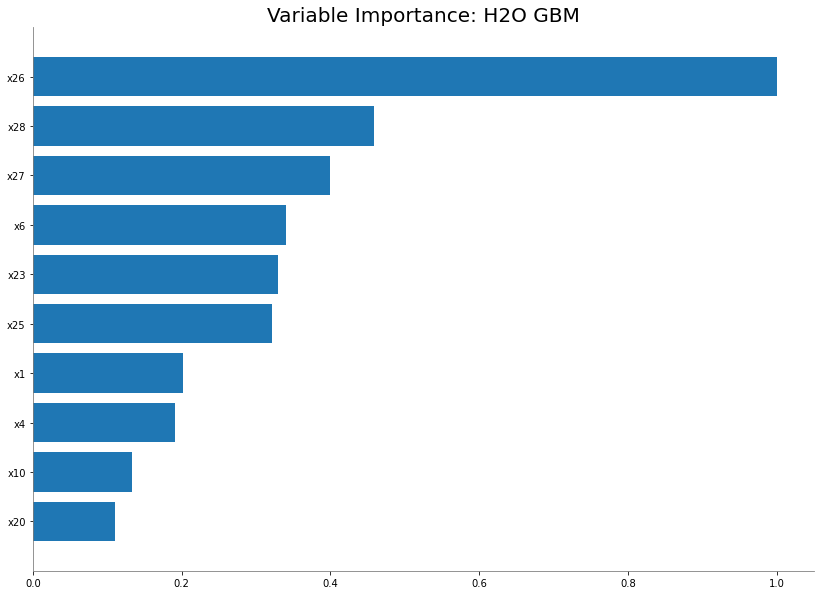

In [6]:
m.varimp_plot()

In [7]:
m.params.keys()

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'max_hit_ratio_k', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'learn_rate', 'learn_rate_annealing', 'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha', 'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'max_abs_leafnode_pred', 'pred_noise_b

In [10]:
m.params['nfolds']

{'actual': 5, 'default': 0, 'input': 5}